<a href="https://colab.research.google.com/github/anamika2000/Customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

**We have 7043 records with 21 different features including customer id and churn**

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()       ## Feature Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Most of the columns are object type, but for developing model we need numeric values and some label encoding as well, so now we will change datatype of some columns and change string values to numeric values by encoding them.**

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
def changeColToStr(data):
    columnsName=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsName:
        data[col]=data[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColToStr(data)
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [ ]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(bool)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [ ]:
NumericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn'])

for columnName in NumericColumns:
    data[columnName]=pd.to_numeric(data[columnName],errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
data.describe()                ## # Descriptive statistics of the data set accessed.

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370
std,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [ ]:
data['Churn'].value_counts()                  ###  The frequency of the dependent variable has been reached.

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
churn = data[data["Churn"] == 1]             ## Access to those who left us through the dependent variable. (churn == 1)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,False,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
8,7892-POOKP,Female,False,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,False,0,0,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1


In [ ]:
churn.groupby("gender").agg({"Churn": "count"})              ##  Who left most than the gender variable?

,Churn
gender,
Female,939
Male,930


In [ ]:
non_churn = data[data["Churn"] == 0]                   ### Access to those who do not leave us on the dependent variable. (churn == 0)
non_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,False,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,False,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0


In [ ]:
non_churn.groupby("gender").agg({"Churn": "count"})

,Churn
gender,
Female,2549
Male,2625


In [ ]:
data.groupby(["gender", "Churn"]).agg({"tenure" : "mean"})              ### They were grouped by gender variable and looked at how many years on average they were clients.

tenure
gender Churn           
Female 0      37.858768
       1      17.004260
Male   0      37.289524
       1      18.963441

In [ ]:
data.groupby("Churn").agg(["min","mean","max"])             ### Min, mean and max values ​​of all variables were taken according to the dependent variable.

SeniorCitizen                  ... TotalCharges                      
                min      mean   max  ...          min         mean      max
Churn                                ...                                   
0             False  0.128721  True  ...        18.80  2555.344141  8672.45
1             False  0.254682  True  ...        18.85  1531.796094  8684.80

[2 rows x 45 columns]

In [ ]:
data.nunique()                 ### Unique observation units were examined.

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
## Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
## If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
## Correlation = 0 means no correlation.
## If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 

data.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102411,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.319072,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064653,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825880,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113008,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.469042,0.040102
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412619,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.510100,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522881,-0.066160
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.432868,-0.164674


## **Data** **Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


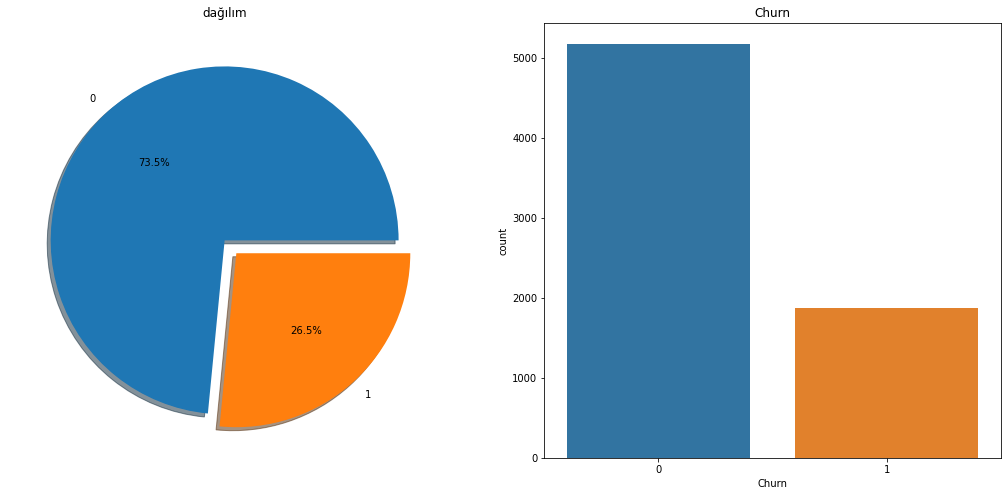

In [ ]:
### The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('Churn',data=data,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

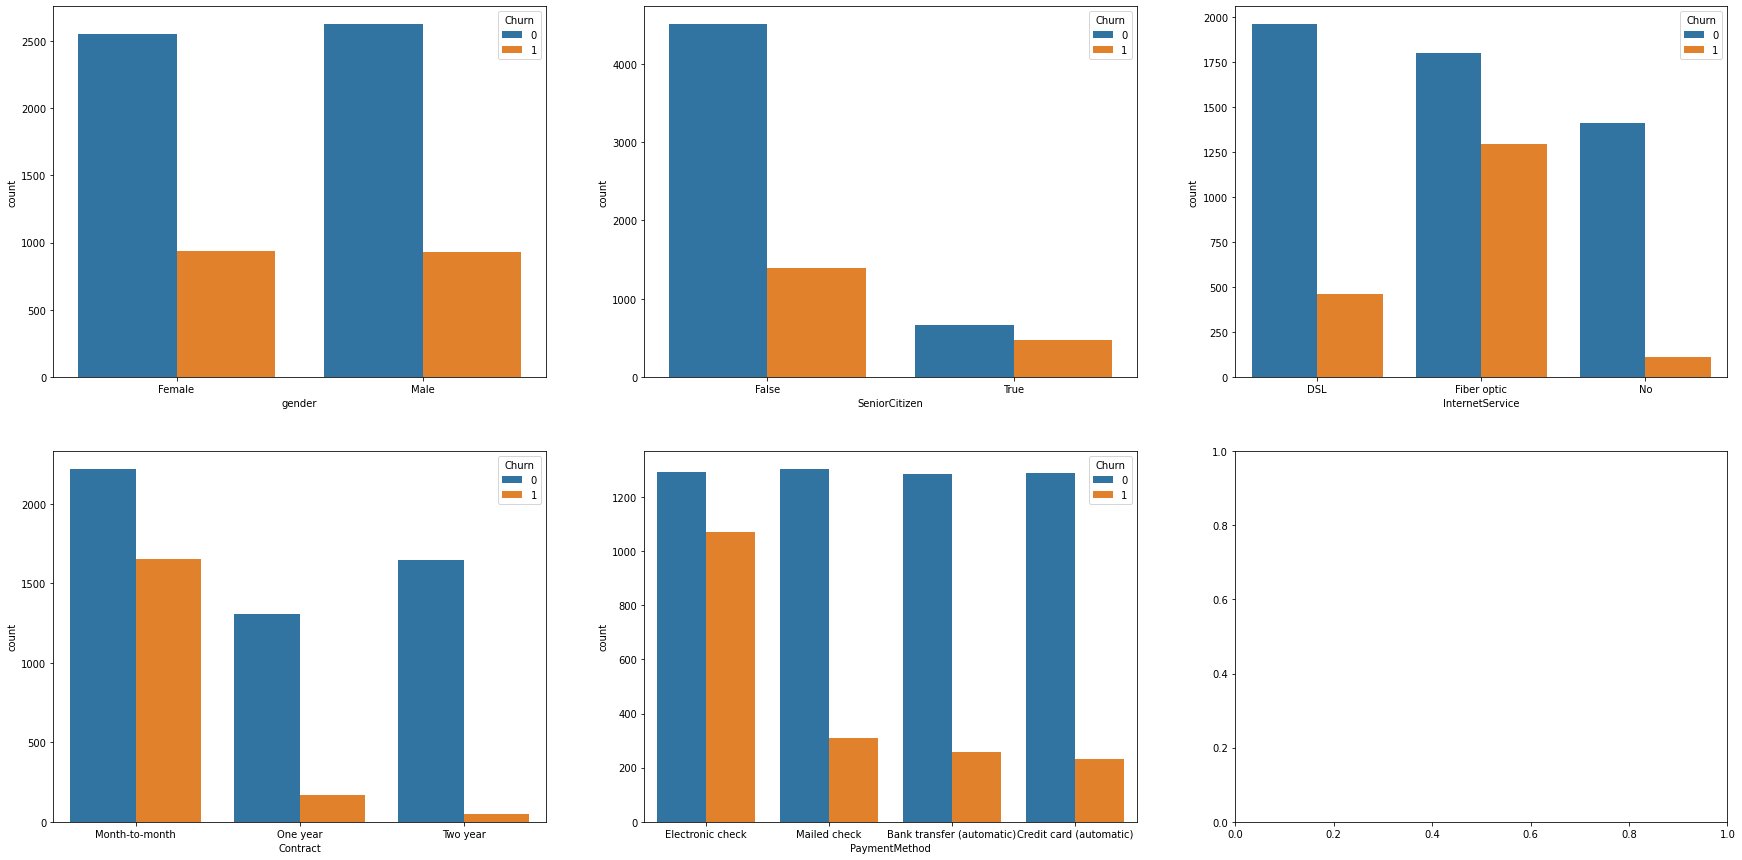

In [ ]:
#### Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 3, figsize=(30, 15))
sns.countplot(x='gender', hue = 'Churn',data = data, ax=axarr[0][0])
sns.countplot(x='SeniorCitizen', hue = 'Churn',data = data, ax=axarr[0][1])
sns.countplot(x='InternetService', hue = 'Churn',data = data, ax=axarr[0][2])
sns.countplot(x='Contract', hue = 'Churn',data = data, ax=axarr[1][0])
sns.countplot(x='PaymentMethod', hue = 'Churn',data = data, ax=axarr[1][1])




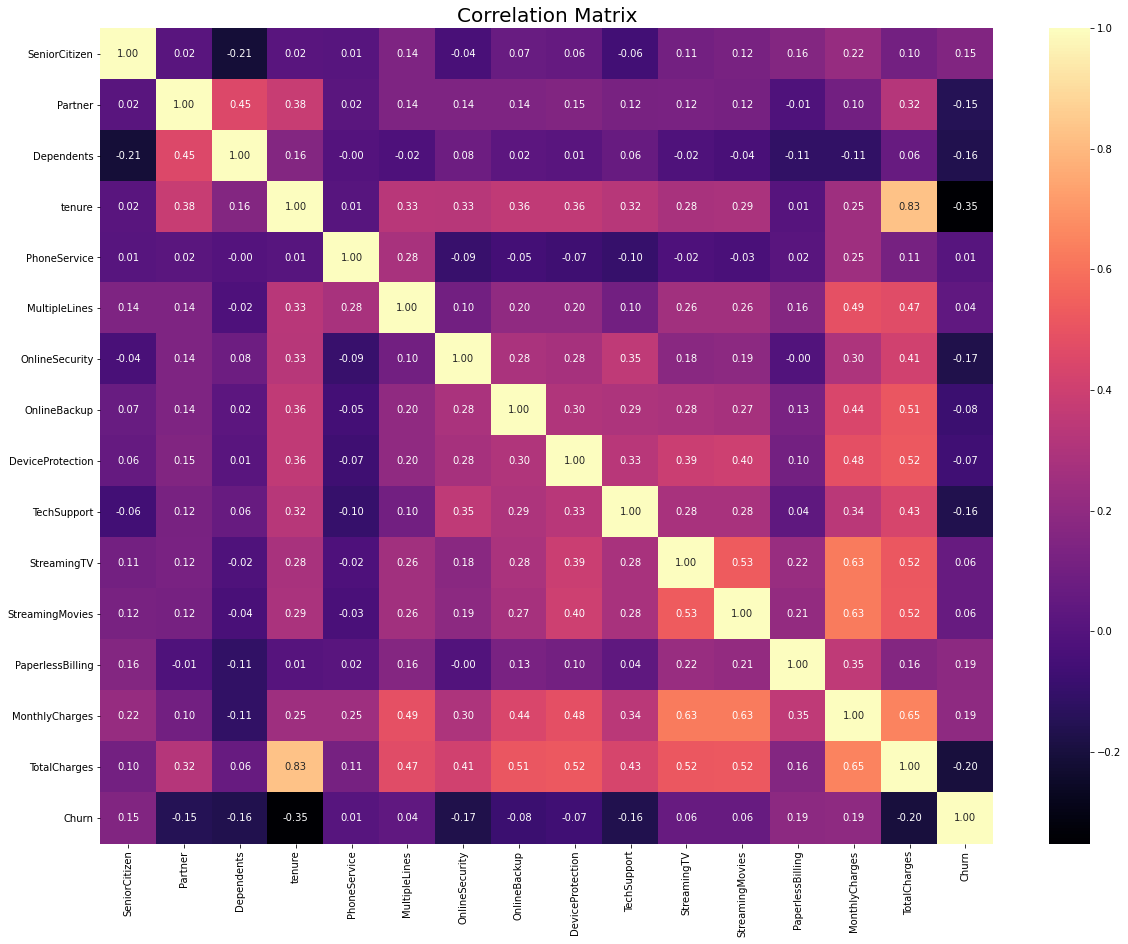

In [ ]:
## Correlation Matrix

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


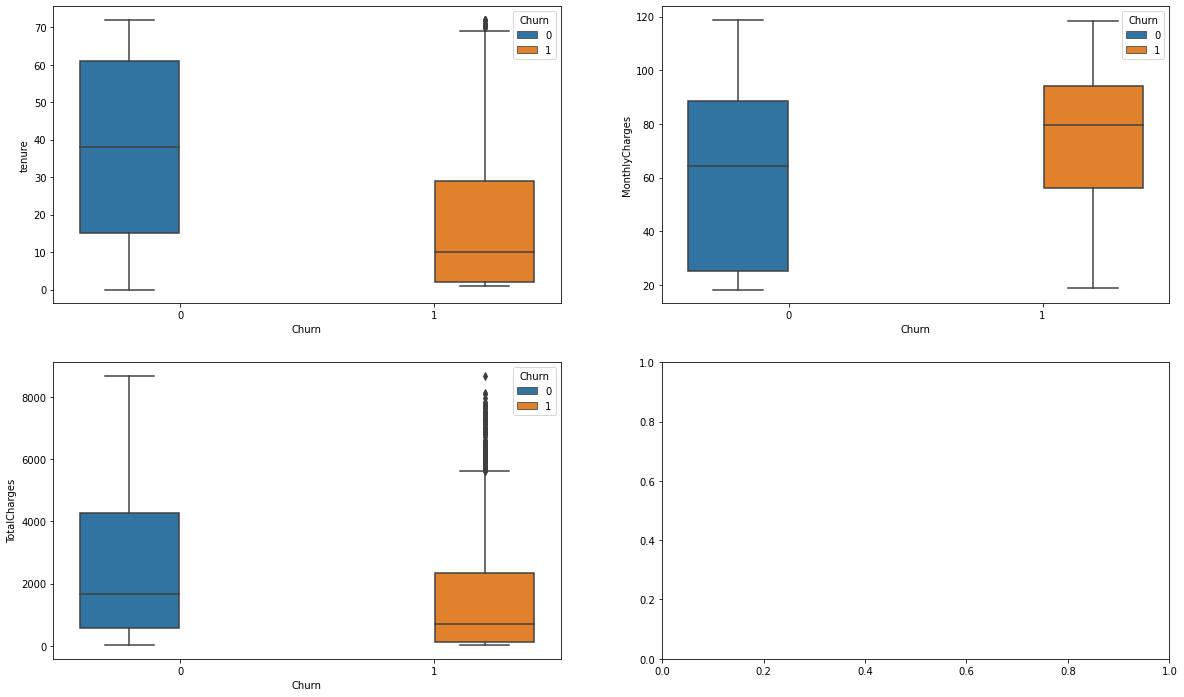

In [ ]:
## # Boxplot graph for outlier observation analysis

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='tenure',x = 'Churn', hue = 'Churn',data = data, ax=axarr[0][0])
sns.boxplot(y='MonthlyCharges',x = 'Churn', hue = 'Churn',data = data , ax=axarr[0][1])
sns.boxplot(y='TotalCharges',x = 'Churn', hue = 'Churn',data = data, ax=axarr[1][0])


## **Data** **Manupulation**

**There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as category and encode them.**

In [ ]:
print("Payment methods: ",data.PaymentMethod.unique())
print("Contract types: ",data.Contract.unique())
print("Gender: ",data.gender.unique())
print("Senior Citizen: ",data.SeniorCitizen.unique())
print("Internet Service Types: ",data.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [ ]:
data['gender']=data['gender'].astype('category')
data['PaymentMethod']=data['PaymentMethod'].astype('category')
data['Contract']=data['Contract'].astype('category')
data['SeniorCitizen']=data['SeniorCitizen'].astype('category')
data['InternetService']=data['InternetService'].astype('category')
data.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService     category
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract            category
PaperlessBilling       int64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object

**Here we have encoded fields with numbers by pandas build-in get_dummies method, and using that method we need to give prefix for new fields which will be generated.**
**This method will generate new fields with prefix and category name as column name and 0 or 1 will be their value.**


In [ ]:
dataPaymentDummies = pd.get_dummies(data['PaymentMethod'], prefix = 'payment')
dataContractDummies = pd.get_dummies(data['Contract'], prefix = 'contract')
dataGenderDummies = pd.get_dummies(data['gender'], prefix = 'gender')
dataSeniorCitizenDummies = pd.get_dummies(data['SeniorCitizen'], prefix = 'SC')
dataInternetServiceDummies = pd.get_dummies(data['InternetService'], prefix = 'IS')



**As we can see below, we got all the new fields with values as 0 or 1.**

In [ ]:
print(dataPaymentDummies.head())
print(dataContractDummies.head())
print(dataGenderDummies.head())
print(dataSeniorCitizenDummies.head())
print(dataInternetServiceDummies.head())

   payment_Bank transfer (automatic)  ...  payment_Mailed check
0                                  0  ...                     0
1                                  0  ...                     1
2                                  0  ...                     1
3                                  1  ...                     0
4                                  0  ...                     0

[5 rows x 4 columns]
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
3                        0                  1                  0
4                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
3              0            1
4              1            0
   SC_False  SC_True
0  

**Now we have new dataframes by label encoding, so we will concat them with our existing dataframe, but before that we will remove category fields as we don't need them right**

In [ ]:
data.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

data = pd.concat([data, dataPaymentDummies], axis=1)
data = pd.concat([data, dataContractDummies], axis=1)
data = pd.concat([data, dataGenderDummies], axis=1)
data = pd.concat([data, dataSeniorCitizenDummies], axis=1)
data = pd.concat([data, dataInternetServiceDummies], axis=1)
data.head()

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
data.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']
data.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank_transfer_auto,payment_Credit_card_auto,payment_Electronic_check,payment_Mailed_check,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0


**We'll convert all fields to number type in dataframe for our model.**

In [ ]:
NumericCol=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in NumericCol:
    data[columnName]=pd.to_numeric(data[columnName],errors='coerce')
data.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [ ]:
data = data.drop(["customerID"], axis = 1)
data.head(2)

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank_transfer_auto,payment_Credit_card_auto,payment_Electronic_check,payment_Mailed_check,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0


In [ ]:
data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)
data.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank_transfer_auto,payment_Credit_card_auto,payment_Electronic_check,payment_Mailed_check,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0
3,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
4,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0


## **Scaling**

In [ ]:
cat_data = data.drop(['Churn','tenure','MonthlyCharges','TotalCharges'],axis=1)
cat_data.head(2)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,payment_Bank_transfer_auto,payment_Credit_card_auto,payment_Electronic_check,payment_Mailed_check,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0


In [ ]:
y=data['Churn']
X=data[['tenure','MonthlyCharges','TotalCharges']]	
cols = X.columns
index = X.index

In [ ]:
X.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


**Here we'll normalize our data by using sklearn's RobustScaler**

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X = pd.concat([X,cat_data], axis = 1)
X.head()

,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,payment_Bank_transfer_auto,payment_Credit_card_auto,payment_Electronic_check,payment_Mailed_check,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,-0.608696,-0.745170,-0.405008,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0.108696,-0.246550,0.144473,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0
2,-0.586957,-0.303588,-0.381873,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0
3,0.347826,-0.516099,0.130068,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
4,-0.586957,0.006440,-0.369019,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
print(X.shape,y.shape)

(7043, 28) (7043,)


## **Train-Test Separation & Balancing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.432, 
                                                    random_state=12345)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 28) (4000,)
Test set: (3043, 28) (3043,)


## **Implement Machine Learning Models**

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

## **Model Evaluation**

 **Accuracy Score**

In [ ]:
result=[]
name=[]
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.793953)
KNN: (0.757805)
CART: (0.727571)
RF: (0.787052)
SVM: (0.792967)
XGB: (0.793625)
LightGBM: (0.784752)


In [ ]:
models2 = []
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
#models2.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))

**Variable Importance Levels of Some Models**

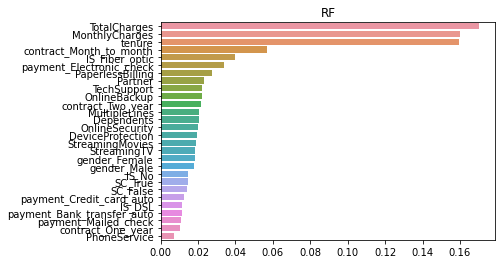

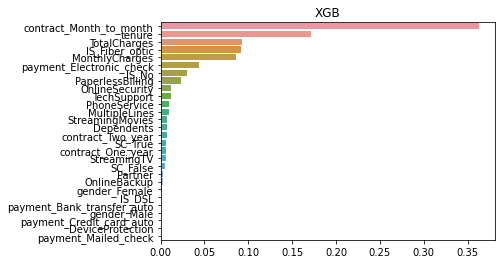

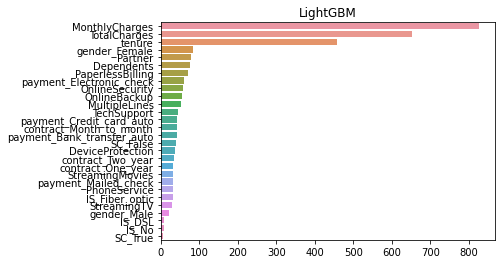

In [ ]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.title(name)
        plt.show()

## **Final Conclusion**

**We're fitting our training data to LogicalRegression and making prediction on our test data.**

**Accuracy of our model is around 79%, and that means 79/100 times we can make correct prediction**

In [ ]:
final_model=[]
final_model.append(('LR', LogisticRegression(random_state = 12345)))
results=[]
names=[]
for name, model in final_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.793953)


**Confusion Matrix**

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_LR[1, 1]
TN = cm_LR[0, 0]
FP = cm_LR[0, 1]
FN = cm_LR[1, 0]

In [ ]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

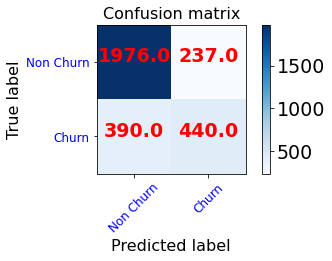

In [ ]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [ ]:
tn, fp, fn, tp = cm_LR.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1976
False Positives:  237
False Negatives:  390
True Positives:  440


 **ROC Curve**

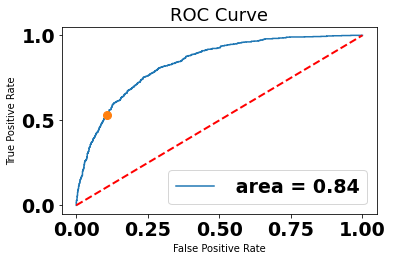

In [ ]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()


## **Reporting**

The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Accuracy Score were calculated.

5) Result; The model created as a result LogisticRegression became the model with the maxium Accuracy Score. (0.7939)